In [4]:
import rpy2.rinterface
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


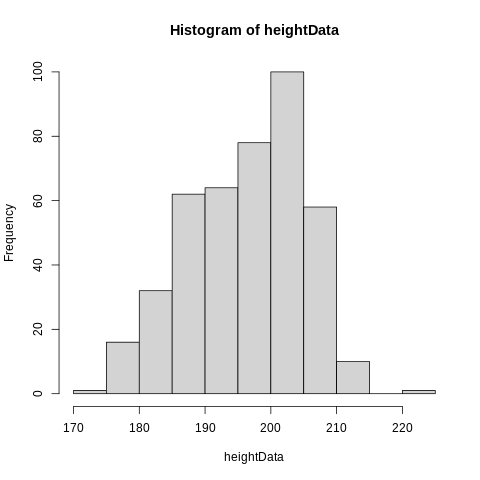

In [7]:
%%R
dataTable <- read.csv("players_stats.csv")

#you can change which variable to use by opening dataTable and replacing "BMI" with "Height", for example
#then Command+F to find heightData and replace all with heightData
heightData <- t(dataTable["Height"])
heightData <- heightData[!is.na(heightData)]

hist(heightData)

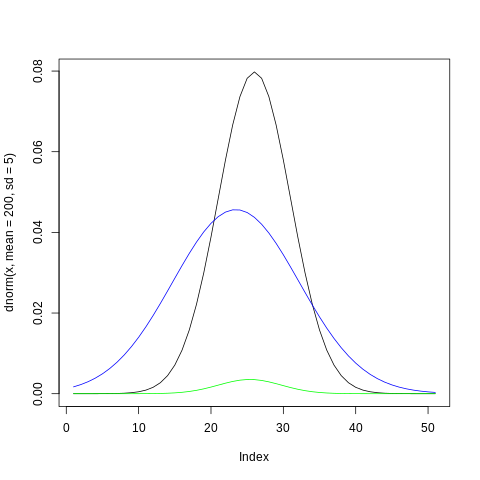

In [6]:
%%R
#Commonly thought that height follows a normal distribution
#N(200, 25) for nba players
x <-seq(from = 175, to =225)
plot(dnorm(x, mean = 200, sd = 5),type = "l")

xbar <- mean(heightData)
stan <- sqrt(var(heightData))
lines(dnorm(x, xbar, stan), col = "blue")
#update now to new model with Bayesian Inference

fn <- 1/(sqrt(2*pi)*5)*exp(-((x-200)^2)/50)
gn <-1/(sqrt(2*pi)*stan)*exp(-((x-xbar)^2)/(2*stan^2))
post <- fn*gn
lines(post, col = "green")